# Time Series
- A lot of financial information is going to come in the form of some value plotted against a time series.
- Time series analysis may be not a good tool for trading algorithm. One of the main reasons for covering these topics is that in future sections, it can show why using some of these analysis techniques on stock information is actually NOT a good idea.
- It can be very tempting to use some of these techniques on financial data, but sometimes it's actually not a good idea, and to understand why that is, first need to understand the techniques themsevles.

## Topic covered
- Time Series Basics
- Statsmodels Python Library
- ETS Models and Decomposition
- EWMA Models -- will useful later on
- ARIMA Models -- not work well for financial data

## Statsmodels
- It's the most popular library in Python for dealing with Time Series data. 
- It is heavily inspired by the R statistical programming language.
- Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests.
- An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import statsmodels.api as sm

In [3]:
# US macro econimic data
df = sm.datasets.macrodata.load_pandas().data

In [5]:
df.tail()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
202,2009.0,3.0,12990.341,9256.0,1486.398,1044.088,10040.6,216.385,1673.9,0.12,9.6,308.013,3.56,-3.44


In [6]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [5]:
# Get index
index = sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3')

In [6]:
df.index = index

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


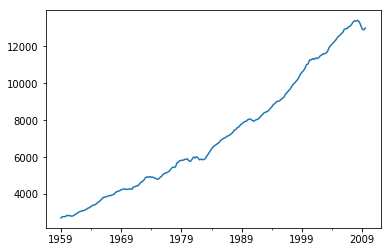

In [8]:
df['realgdp'].plot()

In [9]:
# Hotrick Prescott filter
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [10]:
df['trend']=gdp_trend

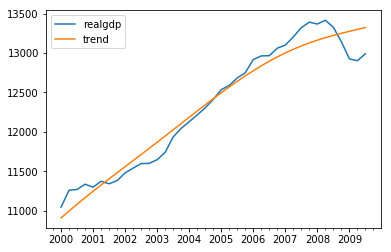

In [11]:
df[['realgdp', 'trend']]['2000-03-31':].plot()

## ETS Decomposition
- ETS Models (Error-Trend-Seasonality)
    - Exponential Smoothing
    - Trend Methods Models
    - ETS Decomposition
    
### ETS Models explaination
- ETS Models will take each of those terms for "smoothing" and may add them, multiply them, or even just leave some of them out.
- Based off these key factors, we can try to create a model to fit out data.

### Time Series Decomposition with ETS
- Breaking down a time series into trend term, seasonal term, and residual term.

In [21]:
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month')

In [22]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


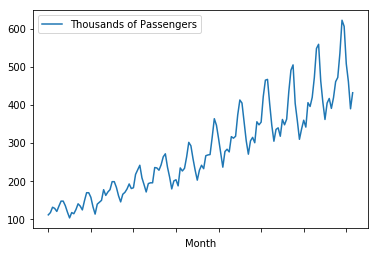

In [23]:
# The plot shows the season influctuation of the data
airline.plot()

We can use an **additive model** when it seems that the trend is more **linear** and the seasonality and trend componnets seem to be constant over time (e.g., every year we add 10,000 passengers). 

A **multiplicative model** is more appropriate when we are increasing (or decreasing) at a **non-linear** rate.

Based off this chart, it looks like the trend in these earlier days is slightly increasing at a higher rate than just linear.

In [24]:
# Get data in correct format
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)

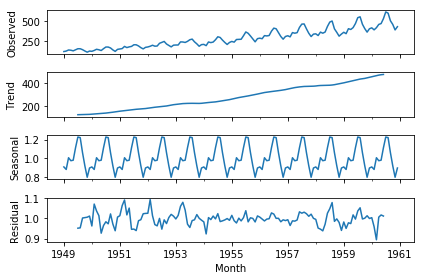

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
fig = result.plot()
# You may accidentally see two of the same plots here, not to worry,
# just a small bug with statsmodels function

## EWMA 
### SMA -- Simple Moving Average

We already know how to create a simple moving average, for a quick review

In [25]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [26]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
1949-06-01,135.0,124.500000,NaN
1949-07-01,148.0,130.500000,NaN
1949-08-01,148.0,135.500000,NaN
1949-09-01,136.0,136.166667,NaN


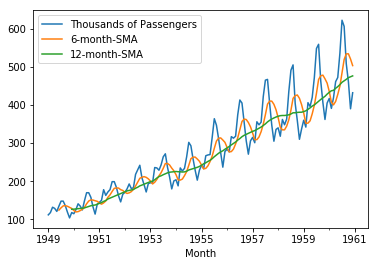

In [27]:
airline.plot()

### EWMA -- Exponentially-weighted moving average

We just showed how to calculate the SMA based on some window. However, basic SMA has some "weakness":
- Smaller windows will lead to more noise, rather than signal.
- It will always lag by the size of the window.
- It will never reach to full peak or valley of the data due to the averaging.
- Does not really inform you about possible future behaviour, all it does is describe trends in your data.
- Extreme historical values can skew your SMA significantly.

To help fix some of these issues, we can use an EWMA. 

EWMA will allow us to reduce the lag effecti from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in teh EWMA and the number of periods given a window size. 
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)

Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \dfrac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from i= 0 to t), and $y_t$ is the output.

Now the question is, how to define the weight $w_i$?

This depends on the adjust parameter you provide to the `.ewm()` method.

When adjust is True (default), weighted averages are calculated using weights:

$ y_t = \dfrac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When `adjust=False` is specified, moving averages are calculated as:
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When `adjust=True`, we have $y_0 = x_0$ and from the last representation above, we have $y_t = \alpha x_t + (1+\alpha) y_{t-1}$, therefore, there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have $0 \le \alpha \le 1$, and while since version 0.18.0, it has been possible to pass $\alpha$ directly, it's often easier to think about either span, center of mass (com) or half-life of an EW moment.

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

- Span corresponds to what is commonly called an "N-day EW Moving Average".
- Center of Mass has a more physical interpretation and can be thought of in terms of span: $c = \dfrac{s-1}{2}$.
- Half-life is the period of time for the exponential weight to reduce to one half.
- Alpha specifies the smoothing factor directly.

In [30]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

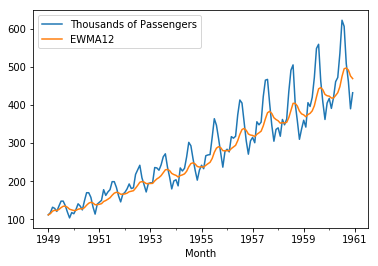

In [31]:
airline[['Thousands of Passengers', 'EWMA12']].plot()

## ARIMA and Seasonal ARIMA

### Autoregressive Integrated Moving Average
The general process for ARIMA models is the following:
- Visualize the Time Series Data
- Make the time series data **stationary**
- Plot the **Correlation** and **Autocorrelation** charts
- Construct the ARIMA Model
- Use the model to make predictions

ARIMA model has two types
- Non-seasonal ARIMA
- Seasonal ARIMA

ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers.

### Autoregression component - AR(p): Autoregression
A regressional model that utilizes the dependent relationship between a current observation and observations over a previous period

### Integrated component - I(d): Differencing
Differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary

### Moving Average component - MA(q): Moving Average
MA is a model that uses the dependency between an observatino and a residual error from a moving average model applied to lagged observations.

### Stationary vs non-stationary data
A stationary series has constant mean and variance over time. A stationary data set will allow our model to predict that the mean and variance will be the same in the future periods.

- Mean keep constant
- Variance keep constant
- Covariance - how fast that variance is changing over a long time - keep constant

There are mathematical tests you can use for stationarity in your data. A common one is the Augmented Dickey-Fuller test. 

If you've determined your data is not stationary (either visually or mathematically), you will then need to transform it to be statinoary in order to evaluate it and determine what type of ARIMA terms you will use. One simple way to do this is through "differencing".

You can continue differencing until you reach stationarity. Each differencing step comes at the cost of losing a row of data.

For seasonal data, you can also difference by a season. For example, if you had monthly data with yearly seasonality, you could difference by a time unit of 12, instead of just 1. Another common technique with seasonal ARIMA models is to combine both methods, taking the seasonal difference of the first difference.

## ACF and PACF
### ACF
- An autocorrelatino plot (also known as a Correlogram) shows the correlation of the series with itself, lagged by x time units.
- So the y axis is the correlation and the x axis is the number of time units of lag.

Our main priority here is to try to figure out wether we will use AR or MA components for the ARIMA model (or both) as well as how many lags we should use.

In general, you would use either AR or MA, using both is less common. When actually applying the AR and MA terms, you well set values of p or q.

- If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use AR terms in relation to the lag.
- If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms.
- This will allow you to decide what actual value of p, d and q to provide your ARIMA model
- p: the number of lag observations included in the model
- d: the number of times that the raw observations are differenced
- q: the size of the moving average window, also called the order of moving average

### PACF
In general, a partial correlation is a conditional correlation. It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables.

For instance, consider a regression context in which y = response variable and $x_1$, $x_2$, and $x_3$ are predictor variables. The partial correlation between y and $x_3$ is the correlation between the variables determined taking into account how both y and $x_3$ are related to $x_1$ and $x_2$.

Typically a sharp drop after lag "k" suggests an AR-k model should be used. If there is a gradual decline, it suggests an MA model.

### Model identification
Identification of an AR model is often best done with the PACF. Identification of an MA model is often best doen with the ACF rather than the PACF.

Once you've analyzed your data using ACF and PACF, you are ready to begin to apply ARIMA or Seasonal ARIMA, depending on your original data. You will provide p, d, and q term for the model.

### Step 1: Get the Data (and format it)

We will be using some data about monthly milk production, full details on it can be found [here](https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line).

Its saved as a csv for you already, let's load it up:

In [33]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [34]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


### Clean up 

In [35]:
df.columns = ['Month', 'Milk in pounds per cow']

In [36]:
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [37]:
df.tail()

,Month,Milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [38]:
# clean the last weird value
df.drop(168, axis=0, inplace=True)

In [39]:
df['Month'] = pd.to_datetime(df['Month'])

In [40]:
df.head()

,Month,Milk in pounds per cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [41]:
df.set_index('Month', inplace=True)

In [42]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [43]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


### Step 2: Visualize the Data
Let's visualize this data with a few methods.

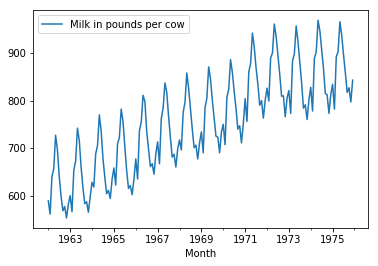

In [43]:
df.plot();

In [44]:
timeseries = df['Milk in pounds per cow']

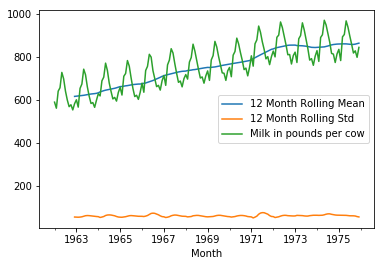

In [45]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend();

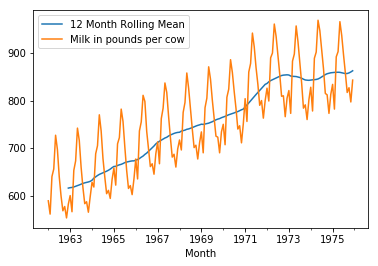

In [46]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.plot()
plt.legend();

### Decomposition
ETS decomposiion allows us to see the individual parts

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

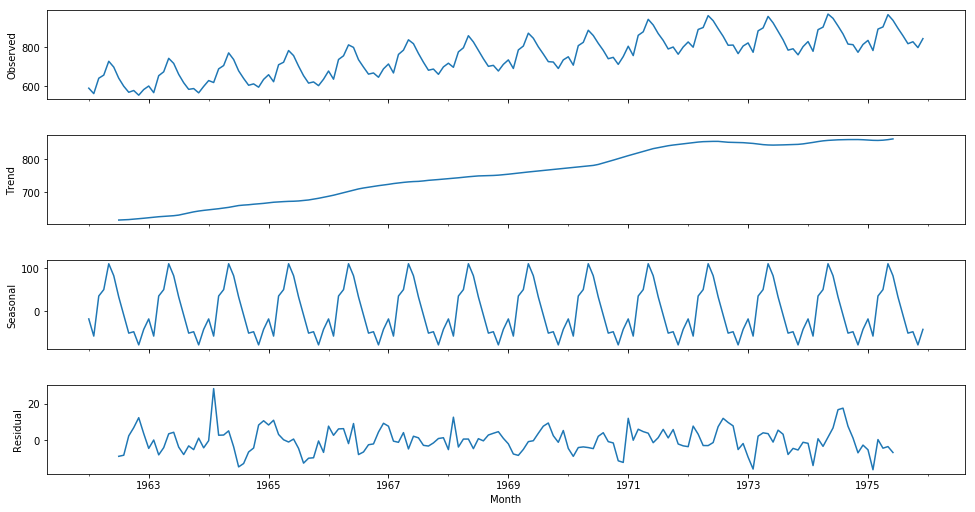

In [51]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'],freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8);

### Testing for Stationary

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [57]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [56]:
from statsmodels.tsa.stattools import adfuller

In [51]:
result = adfuller(df['Milk in pounds per cow'])

In [52]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

for value, label in zip(result, labels):
    print(label + ' : ' + str(value))
    
if result[1] <= 0.05:
    print('String evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
else:
    print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.30381158742
p-value : 0.627426708603
#Lags Used : 13
Number of Observations Used : 154
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [61]:
# Functionize adf check
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

    if result[1] <= 0.05:
        print('String evidence against the null hypothesis, \nreject the null hypothesis. \nData has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis, \ntime series has a unit root, \nindicating it is non-stationary')

In [62]:
adf_check(df['Milk in pounds per cow'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3038115874221248
p-value : 0.6274267086030337
#Lags Used : 13
Number of Observations Used : 154
Weak evidence against null hypothesis, 
time series has a unit root, 
indicating it is non-stationary


In [63]:
df['First difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

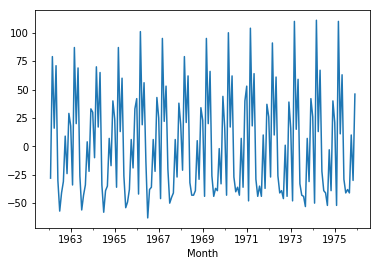

In [64]:
df['First difference'].plot()

In [65]:
adf_check(df['First difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.05499555865311
p-value : 0.030068004001782334
#Lags Used : 14
Number of Observations Used : 152
String evidence against the null hypothesis, 
reject the null hypothesis. 
Data has no unit root and is stationary


In [66]:
df['Second difference'] = df['First difference'] - df['First difference'].shift(1)

In [67]:
adf_check(df['Second difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -14.327873645603345
p-value : 1.1126989332082667e-26
#Lags Used : 11
Number of Observations Used : 154
String evidence against the null hypothesis, 
reject the null hypothesis. 
Data has no unit root and is stationary


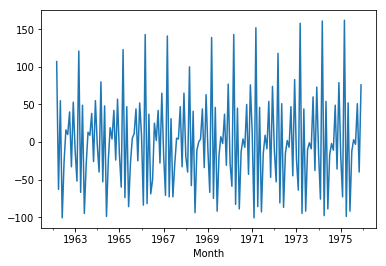

In [68]:
df['Second difference'].plot()

In [69]:
df['Seasonal difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

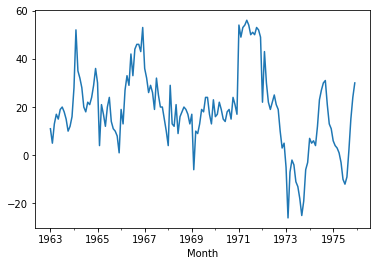

In [70]:
df['Seasonal difference'].plot()

In [71]:
adf_check(df['Seasonal difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359397
p-value : 0.16079880527711382
#Lags Used : 12
Number of Observations Used : 143
Weak evidence against null hypothesis, 
time series has a unit root, 
indicating it is non-stationary


In [72]:
df['Seasonal first difference'] = df['First difference'] - df['First difference'].shift(12)

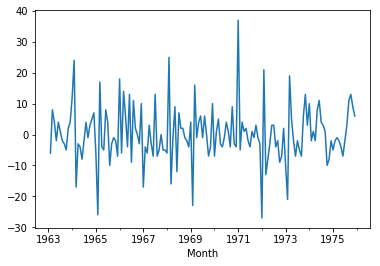

In [73]:
df['Seasonal first difference'].plot()

In [74]:
adf_check(df['Seasonal first difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921979
p-value : 1.865423431878876e-05
#Lags Used : 11
Number of Observations Used : 143
String evidence against the null hypothesis, 
reject the null hypothesis. 
Data has no unit root and is stationary


## Implement ACF and PACF

In [75]:
df.head()

,Milk in pounds per cow,First difference,Second difference,Seasonal difference,Seasonal first difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN


In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

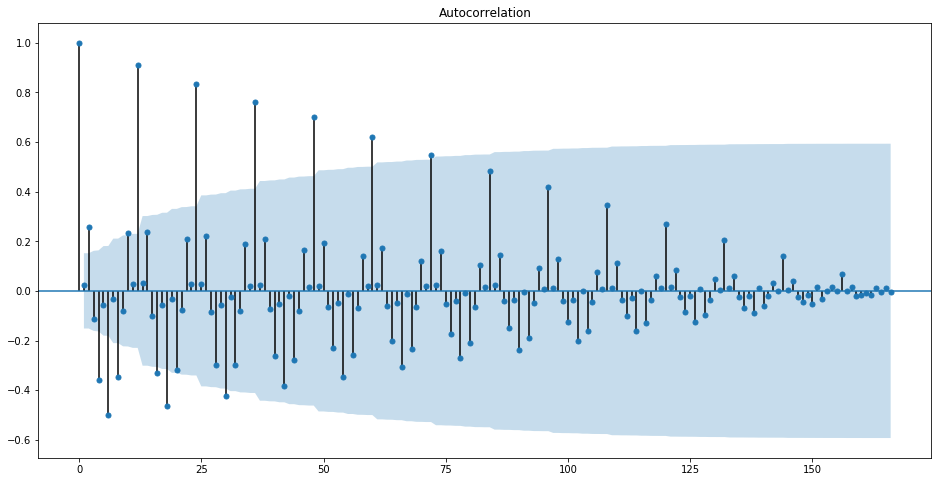

In [79]:
fig_first = plot_acf(df['First difference'].dropna())
fig_first.set_size_inches(16, 8)

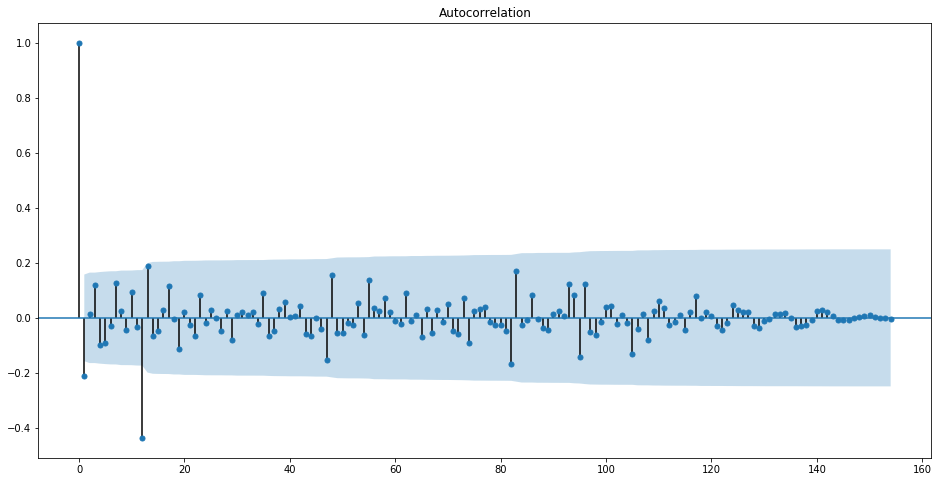

In [80]:
fig_seasonal_first = plot_acf(df['Seasonal first difference'].dropna())
fig_seasonal_first.set_size_inches(16, 8)

In [81]:
# Create ACF using pandas embedded function -- pandas does not have function for PACF
from pandas.plotting import autocorrelation_plot

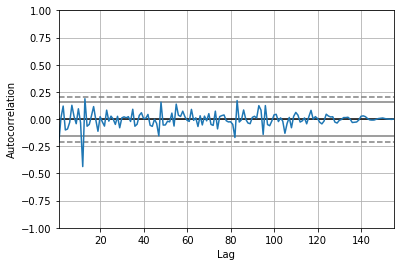

In [82]:
autocorrelation_plot(df['Seasonal first difference'].dropna())

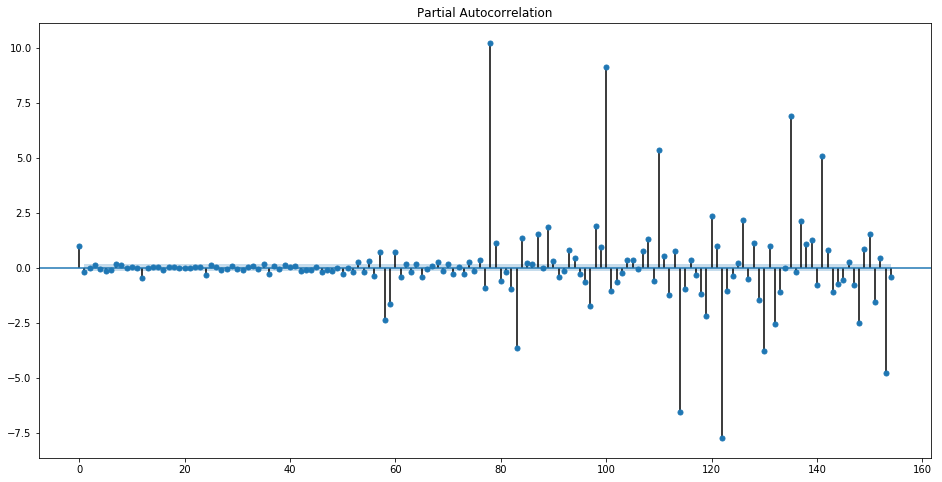

In [84]:
result = plot_pacf(df['Seasonal first difference'].dropna())
result.set_size_inches(16,8)

## Seasonal ARIMA model

In [86]:
from statsmodels.tsa.arima_model import ARIMA

In [87]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'], order=(0,1,0), seasonal_order=(1,1,1,12))

/Users/sunyuan/anaconda/lib/python2.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [88]:
results = model.fit()

In [89]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 01 Jul 2018   AIC                           1074.131
Time:                                    13:24:33   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

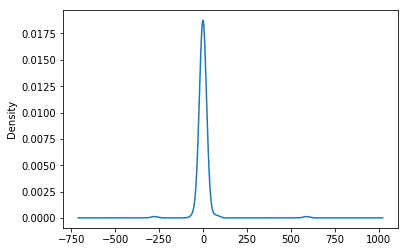

In [92]:
results.resid.plot(kind = 'kde')

In [96]:
df['Forecast'] = results.predict(start = 150, end=168)

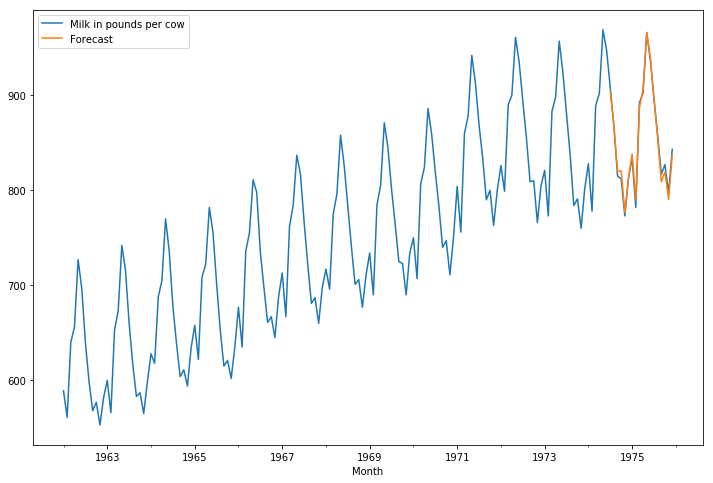

In [97]:
df[['Milk in pounds per cow', 'Forecast']].plot(figsize=(12,8))

### Forecast real values

In [99]:
from pandas.tseries.offsets import DateOffset

In [100]:
future_dates = [df.index[-1] + DateOffset(months =x) for x in range(1, 24)]

In [103]:
future_df = pd.DataFrame(index=future_dates, columns = df.columns)

In [104]:
final_df = pd.concat([df, future_df])

In [107]:
final_df['Forecast'] = results.predict(start=168, end = 192)

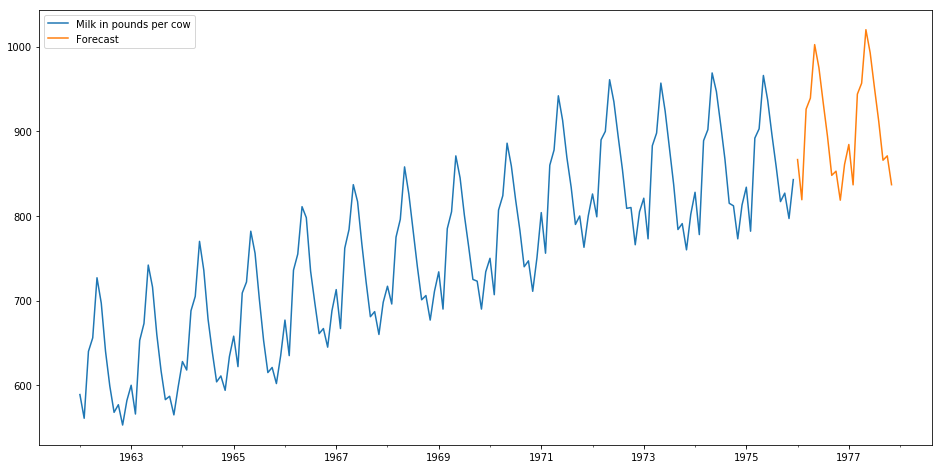

In [109]:
final_df[['Milk in pounds per cow', 'Forecast']].plot(figsize=(16,8))

## Discussion on choosing p, d, and q
For resources for choosing the PDQ, check out the reading here (keep in mind, it can be complex, but mostly uses the autocorrelation and partial auto correlation plots):

[Full Book Chapter on this:](https://people.duke.edu/~rnau/arimrule.htm)

[Nice example:](https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima)